In [34]:
import pandas as pd
import os
os.chdir("/home/robbe/ionbot")
import OxiAnalysis as OA
import warnings; warnings.simplefilter('ignore')

# Prepare ageing study data for Analysis

In [50]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/Ageing_study_combined/quant/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type|Unnamed')), axis = 1, inplace = True)
quant = quant[~quant["Protein Groups"].str.contains("sp|", na=False, regex=False)]

In [51]:
quant

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_150828_PC_VUR_C1077,Intensity_150828_PC_VUR_C1133,Intensity_150828_PC_VUR_C1134,Intensity_150828_PC_VUR_C1138,Intensity_150828_PC_VUR_C1189,...,Intensity_1DLC012615QE_RRAG_006B_rep2,Intensity_1DLC012615QE_RRAG_014B_rep1,Intensity_1DLC012615QE_RRAG_014B_rep2,Intensity_1DLC051815QE_RRAG_011B_rep1,Intensity_1DLC051815QE_RRAG_011B_rep2,Intensity_1DLC051815QE_RRAG_028B_rep1,Intensity_1DLC051815QE_RRAG_028B_rep2,Intensity_1DLC052815QE_RRAG_024B_rep1,Intensity_1DLC052815QE_RRAG_024B_rep2,Intensity_1DLC052815QE_RRAG_025B_rep1
0,AAAAAAAAAAGAAGGRx|[488]DHP[C],AAAAAAAAAAGAAGGR,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,528581.786458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAAAAAAAAKNGSSGKnan,AAAAAAAAAKNGSSGK,;PHX2B_HUMAN,NaN,NaN,2.241791e+06,184369.112305,143175.222656,427382.287519,343967.695312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAAAAAAAAVSRR12|[981]glucosone[R],AAAAAAAAAVSRR,;ZFP91_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAAAAAAAGAFAGRR14|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAAAAAAAGAFAGRR8|[1918]Carbonyl[A],AAAAAAAAGAFAGRR,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63957,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[4]c...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63958,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[6]C...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63959,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[100...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63960,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[6]C...,YYYVCQYCPAGNWANR,;CRIS3_HUMAN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
cols = [col for col in quant.columns if "Intensity" in col]
quant = OA.quantile_transform(quant, cols)

<Axes: ylabel='Density'>

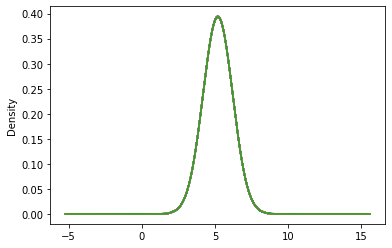

In [53]:
quant[cols].plot.kde(legend=False)

In [55]:
quant[cols] = quant[cols].transform(lambda x: x/x.sum())

In [56]:
quant

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_150828_PC_VUR_C1077,Intensity_150828_PC_VUR_C1133,Intensity_150828_PC_VUR_C1134,Intensity_150828_PC_VUR_C1138,Intensity_150828_PC_VUR_C1189,...,Intensity_1DLC012615QE_RRAG_006B_rep2,Intensity_1DLC012615QE_RRAG_014B_rep1,Intensity_1DLC012615QE_RRAG_014B_rep2,Intensity_1DLC051815QE_RRAG_011B_rep1,Intensity_1DLC051815QE_RRAG_011B_rep2,Intensity_1DLC051815QE_RRAG_028B_rep1,Intensity_1DLC051815QE_RRAG_028B_rep2,Intensity_1DLC052815QE_RRAG_024B_rep1,Intensity_1DLC052815QE_RRAG_024B_rep2,Intensity_1DLC052815QE_RRAG_025B_rep1
0,AAAAAAAAAAGAAGGRx|[488]DHP[C],AAAAAAAAAAGAAGGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000066,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAAAAAAAAKNGSSGKnan,AAAAAAAAAKNGSSGK,;PHX2B_HUMAN,NaN,NaN,0.000106,0.00006,0.00007,0.000059,0.000062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAAAAAAAVSRR12|[981]glucosone[R],AAAAAAAAAVSRR,;ZFP91_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAAAAAAGAFAGRR14|[1918]Carbonyl[R],AAAAAAAAGAFAGRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAAAAAAAGAFAGRR8|[1918]Carbonyl[A],AAAAAAAAGAFAGRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63957,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[4]c...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63958,YYYVCQYCPAGNWANR5|[4]carbamidomethyl[C]|8|[6]C...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63959,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[100...,YYYVCQYCPAGNWANR,CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63960,YYYVCQYCPAGNWANR8|[4]carbamidomethyl[C]|5|[6]C...,YYYVCQYCPAGNWANR,;CRIS3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
quant.to_csv("Ageing_combined.csv")